In [1]:
import helpers
from helpers import Loader

import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from collections import Counter
from sklearn import preprocessing

/Users/shawlu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/shawlu/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
loader = Loader()

### Using Numeric Features Only

In [24]:
X_trn_encoded.shape

(100000, 276)

In [19]:
X_trn, Y_trn = loader.load("trn_set", ignore_categorical=True, nrows=100000)
X_dev, Y_dev = loader.load("dev_set", ignore_categorical=True, nrows=10000)

In [20]:
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(X_trn, Y_trn)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

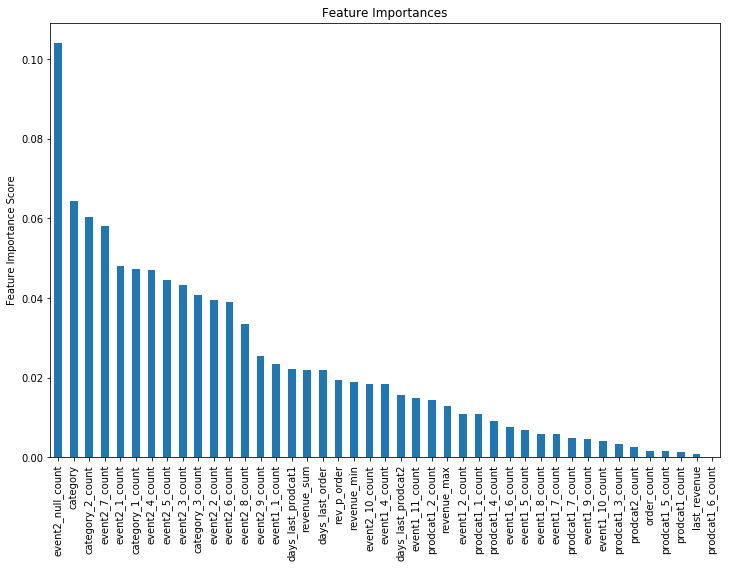

In [22]:
plt.figure(figsize=(12, 8))
feat_imp = pd.Series(gbm.feature_importances_, X_trn.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.savefig("figs/features_ranking.png")

In [6]:
Y_pred = gbm.predict(X_dev)

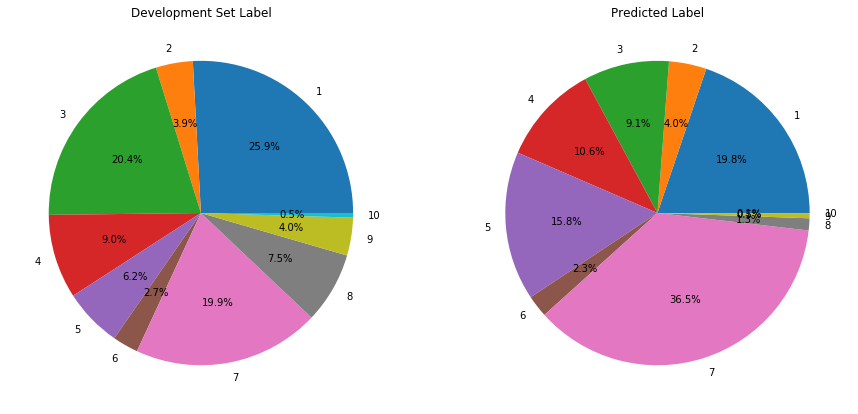

In [7]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)

value_counts = Counter(Y_dev)
_ = ax1.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%', 
            labeldistance = 1.1)
ax1.set_title('Development Set Label')

ax2 = plt.subplot(1, 2, 2)

value_counts = Counter(Y_pred)
_ = ax2.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%',
            labeldistance = 1.1)

ax2.set_title('Predicted Label')

plt.show()

In [8]:
print("Accuracy : %.4g" % metrics.accuracy_score(Y_dev.values, Y_pred))

Accuracy : 0.3607


### Add categorical features

In [9]:
X_trn, Y_trn = loader.load("trn_set", ignore_categorical=False, nrows=100000)
X_dev, Y_dev = loader.load("dev_set", ignore_categorical=False, nrows=10000)

In [10]:
ohe = preprocessing.OneHotEncoder(handle_unknown="ignore")
ohe.fit(X_trn[loader.cat_cols].fillna(0))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_values='auto', sparse=True)

In [11]:
X_trn_encoded = loader.encode(ohe, X_trn)
X_dev_encoded = loader.encode(ohe, X_dev)

In [12]:
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(X_trn_encoded, Y_trn)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [13]:
Y_pred = gbm.predict(X_dev_encoded)

In [14]:
Y_dev.value_counts() / len(Y_dev)

1     0.2585
3     0.2041
7     0.1985
4     0.0895
8     0.0755
5     0.0623
9     0.0402
2     0.0393
6     0.0273
10    0.0048
Name: event2, dtype: float64

In [15]:
print("Accuracy : %.4g" % metrics.accuracy_score(Y_dev.values, Y_pred))

Accuracy : 0.387


In [17]:
X_trn.shape

(100000, 50)